In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


In [ ]:
df = pd.read_csv ("./BookReviews.csv")

In [ ]:
def print_relevant_info(df):
    print(f"Shape: {df.shape}")
    print(f"Info: \n{df.info()}")

In [ ]:
df.columns = ['User Id', 'Comic Id', 'Rating']
df

,User Id,Comic Id,Rating
0,4980305f36ab8c2ab831e401a185f28a,13573616,5
1,4980305f36ab8c2ab831e401a185f28a,12712367,5
2,4980305f36ab8c2ab831e401a185f28a,12309315,5
3,4980305f36ab8c2ab831e401a185f28a,11297580,5
4,4980305f36ab8c2ab831e401a185f28a,21412000,5
...,...,...,...
1495004,98f60eac2d71abd2956f93de2f8c4e9d,26138086,2
1495005,98f60eac2d71abd2956f93de2f8c4e9d,7703037,4
1495006,98f60eac2d71abd2956f93de2f8c4e9d,22718721,3
1495007,98f60eac2d71abd2956f93de2f8c4e9d,26067594,4


In [ ]:
def basic_statistics(df):
  df.columns = ['user', 'item', 'rating']
  print("#Users: ", len(df['user'].unique()))
  print("#Books: ", len(df['item'].unique()))

In [ ]:
def get_encoder(df):
    encoder = LabelEncoder()
    encoder.fit(df['user'])
    return encoder


In [ ]:
def encode_user_id_column(df, encoder):
    encoded_ids = encoder.transform(df['user'])
    df['encoded_user_ids'] = encoded_ids
    return df[['encoded_user_ids', 'item', 'rating']]


In [ ]:
def plot_ratings_data(df):

    colors = ['dodgerblue', 'orange', 'yellowgreen', 'red', 'mediumpurple']
    bar_data = pd.DataFrame(
        {
            'rating': df.rating.value_counts().index,
            'count_ratings': df.rating.value_counts().values
        }
    ).sort_values(by=['rating'])

    plt.bar(bar_data.rating, bar_data.count_ratings, color = colors)

    for i in range(len(bar_data.rating)):
      plt.annotate(str(bar_data.count_ratings[i]), xy=(bar_data.rating[i],bar_data.count_ratings[i]), ha='center', va='bottom')

    plt.title("Distribution of ratings in the dataset")
    plt.xlabel("Rating")
    plt.ylabel("No of ratings")
    plt.tight_layout()
    plt.show()


In [ ]:

def plot_reading_distribution(df):
    g = sns.displot(df.encoded_user_ids.value_counts().values, kde=True, bins=150)
    g.fig.set_figheight(6)
    g.fig.set_figwidth(10)
    plt.xlabel('No of books read by a user')
    plt.ylabel("No of users")
    plt.grid(zorder=-1.0)
    plt.title("How many books are read by the users individually?")
    plt.tight_layout()
    plt.show()


In [ ]:
def sparse_matrix_visualization(df):
    ratings_matrix = df.pivot(
        index='encoded_user_ids',
        values='rating',
        columns=['item']
    ).fillna(0)
    ratings_matrix.head()
    myColors = (['gainsboro', 'orange', 'green', 'red', 'blue'])
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    hm = sns.heatmap(ratings_matrix, cmap=cmap)
    hm.set(xticklabels=[], yticklabels=[])
    hm.set(xlabel=f"{ratings_matrix.shape[1]} books", ylabel=f"{ratings_matrix.shape[0]} users")
    colorbar = hm.collections[0].colorbar
    colorbar.set_ticks([0.416, 1.25, 2.08, 2.912, 3.749, 4.581])
    colorbar.set_ticklabels(['0', '1', '2', '3', '4', '5'])
    plt.tight_layout()
    plt.show()


In [ ]:
print_relevant_info(df)

Shape: (1495009, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495009 entries, 0 to 1495008
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1495009 non-null  object
 1   book_id  1495009 non-null  int64 
 2   rating   1495009 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 34.2+ MB
Info: 
None


In [ ]:
basic_statistics(df)

#Users:  8728
#Books:  7789


In [ ]:
encoder = get_encoder(df)

In [ ]:
new_df = encode_user_id_column(df, encoder)

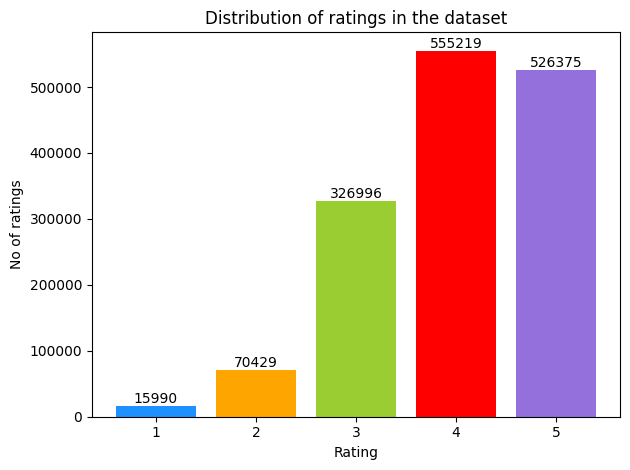

In [ ]:
plot_ratings_data(new_df)

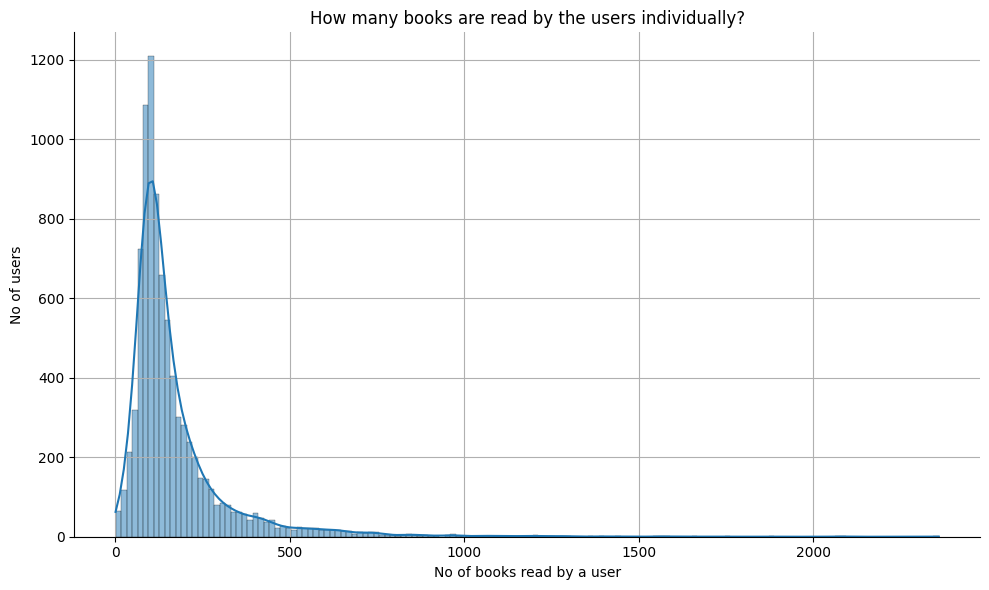

In [ ]:
plot_reading_distribution(new_df)

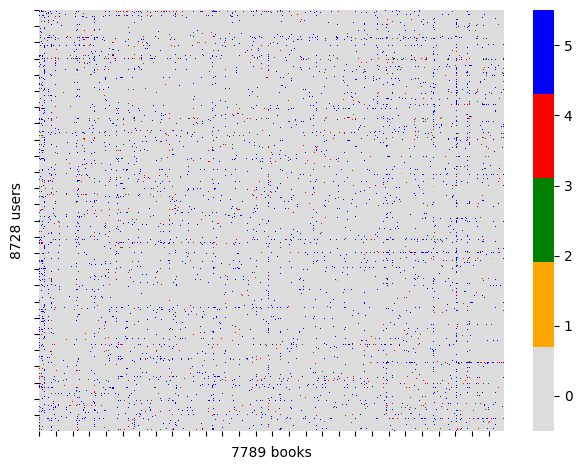

In [ ]:
sparse_matrix_visualization(new_df)